In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Loading and Exploratory Data Analysis

In [3]:
train=pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv')
train_2=pd.read_csv('/kaggle/input/playground-series-s5e2/training_extra.csv')
test=pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv')
submissions=pd.read_csv('/kaggle/input/playground-series-s5e2/sample_submission.csv')

In [4]:
train.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [5]:
train_2.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461


In [6]:
print(train_2.shape)
print(train.shape)

(3694318, 11)
(300000, 11)


Text(0.5, 1.0, 'Distribution of price')

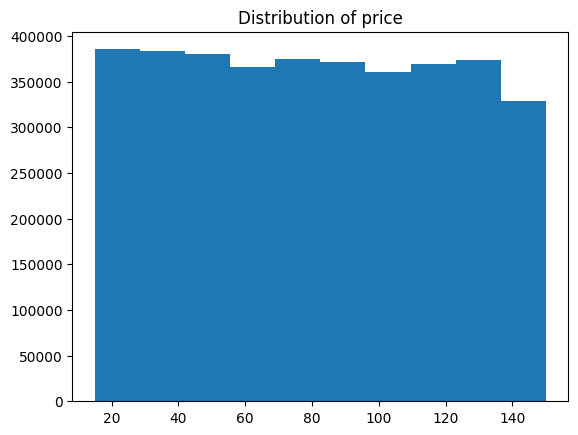

In [7]:
plt.hist(x=train_2['Price'])
plt.title('Distribution of price')

In [8]:
train_2.isnull().sum()

id                           0
Brand                   117053
Material                102615
Size                     81190
Compartments                 0
Laptop Compartment       91089
Waterproof               87274
Style                    96210
Color                   123667
Weight Capacity (kg)      1670
Price                        0
dtype: int64

Text(0.5, 1.0, 'Distribution of price')

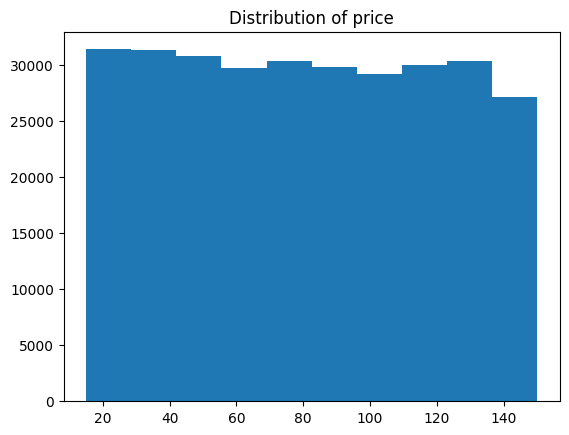

In [9]:
plt.hist(x=train['Price'])
plt.title('Distribution of price')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


# Feature Engineering

## Missing Values

In [11]:
train.isnull().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

We can oberseve that all columns except compartments and price have null values

In [12]:
features_with_na=[feature for feature in train.columns if train[feature].isnull().sum()>1]
features_with_na

['Brand',
 'Material',
 'Size',
 'Laptop Compartment',
 'Waterproof',
 'Style',
 'Color',
 'Weight Capacity (kg)']

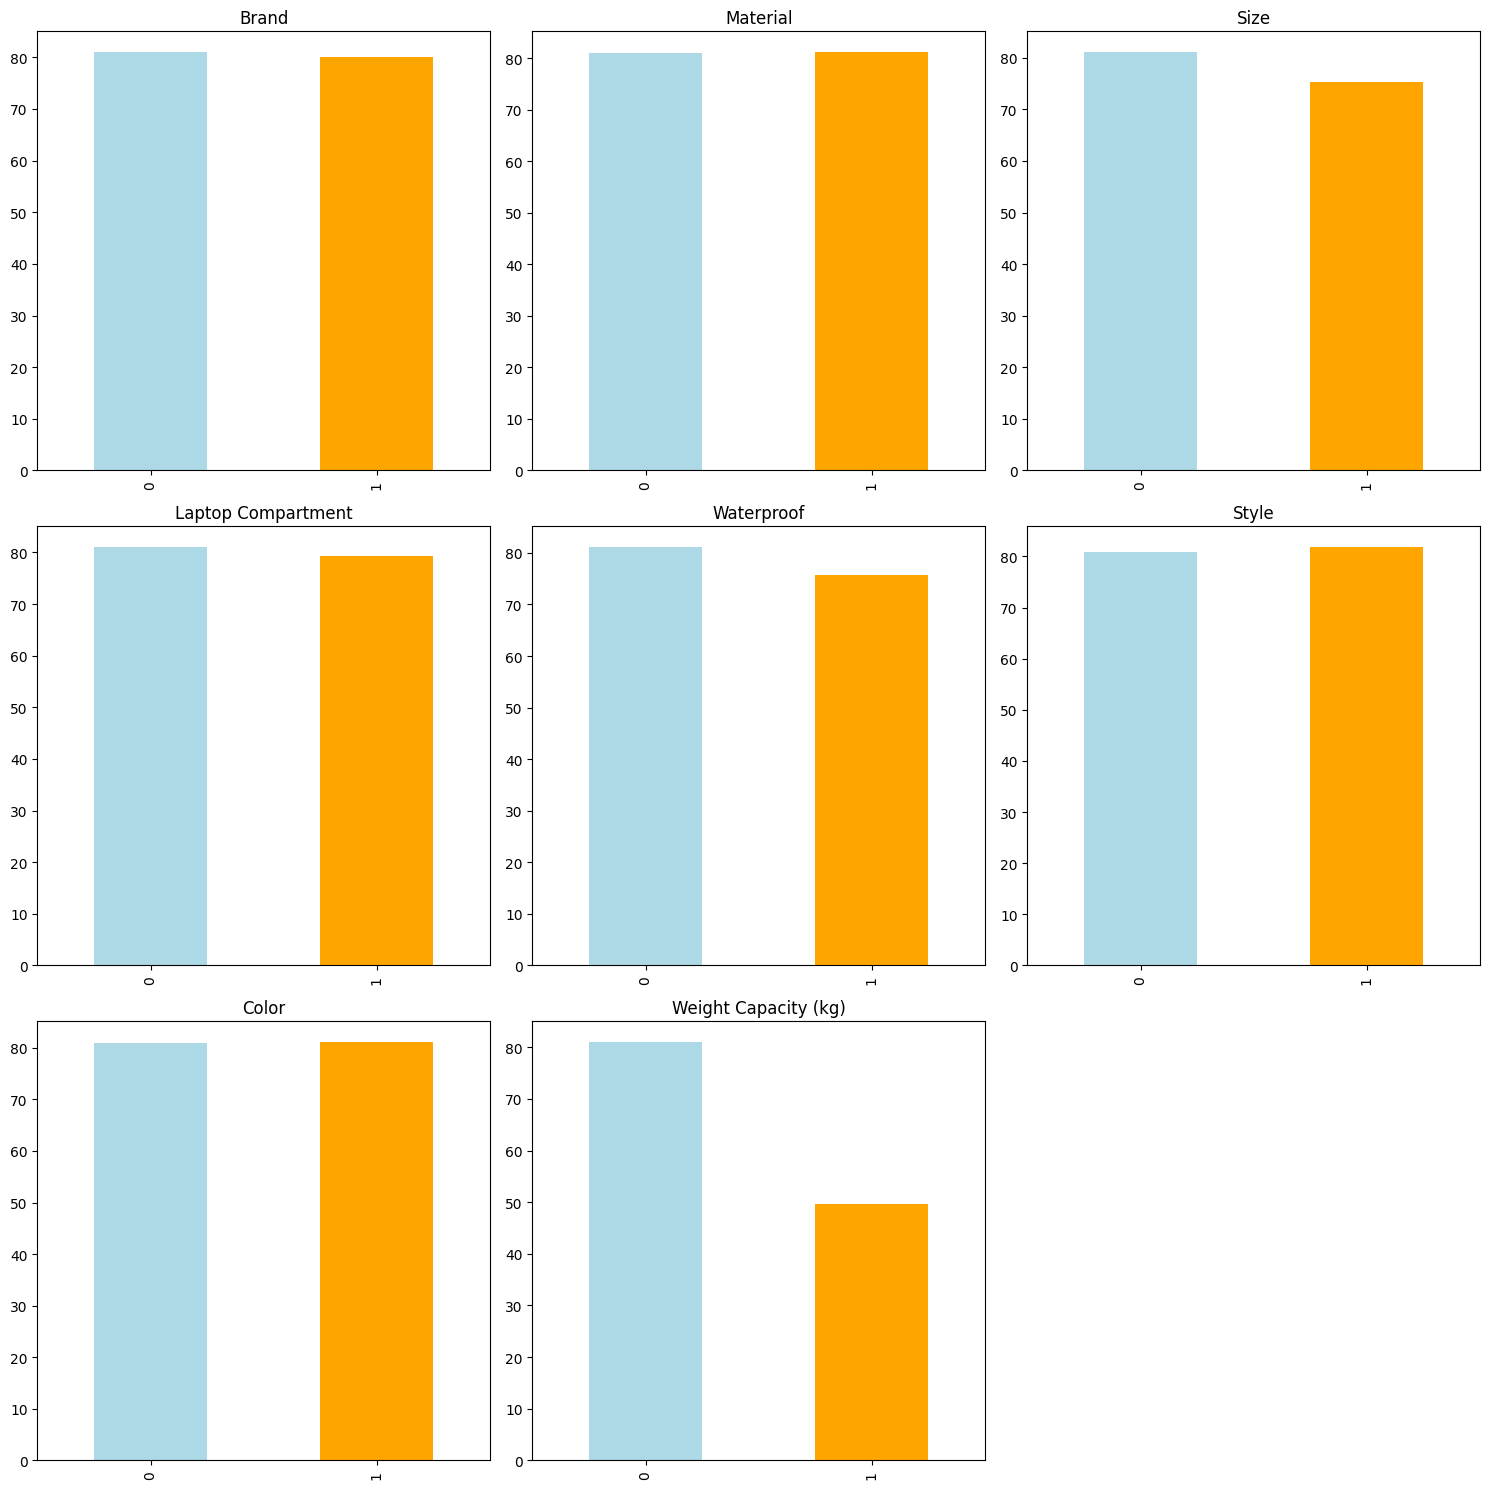

In [13]:
#identifying impact of features with null values on our dependent variable 
rows=int(np.ceil(len(features_with_na)/3))
col=3
#creating figure and set size
fig, axes=plt.subplots(rows,col,figsize=(15, rows*5))
axes=axes.flatten()

#looping throught features and creating suplots
for idx, feature in enumerate(features_with_na):
    data=train.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    #plot on current subplot
    data.groupby(feature)['Price'].median().plot.bar(ax=axes[idx],color=['lightblue','orange'])
    axes[idx].set_title(feature)
    axes[idx].set_xlabel('') 
#hides any unused subplots
for idx in range(len(features_with_na), len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout()
plt.show()

Our null values are in orange and we can observe that they have significant impact on our dependent variable i.e price

In [14]:
numerical_features=[feature for feature in train.columns if train[feature].dtype!='O']
print('Numerical Features of data are :',numerical_features)

Numerical Features of data are : ['id', 'Compartments', 'Weight Capacity (kg)', 'Price']


In train dataset weight is the numerical feature with missing values

Text(0.5, 1.0, 'Average weights of bagpack based on brands')

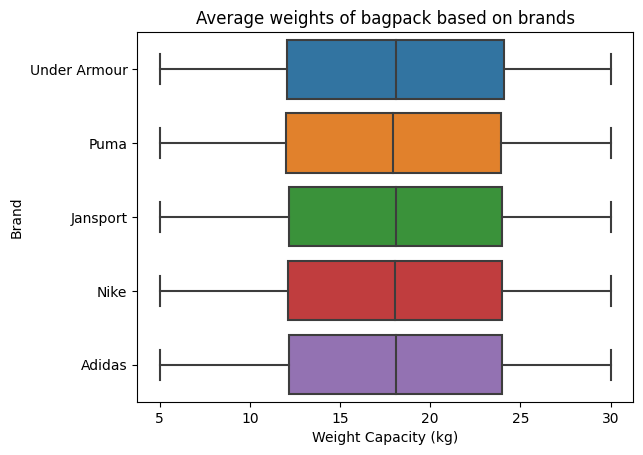

In [15]:
sns.boxplot(x='Weight Capacity (kg)', y='Brand',data=train_2)
plt.title('Average weights of bagpack based on brands')

We can observe average weight of bags from all brands are same, along wiht no outliers so we can fill in mean/average values in missing values for weight capacity

In [16]:
train['Weight Capacity (kg)']=train['Weight Capacity (kg)'].fillna(train['Weight Capacity (kg)'].median())
train_2['Weight Capacity (kg)']=train_2['Weight Capacity (kg)'].fillna(train_2['Weight Capacity (kg)'].median())

In [17]:
categorical_features=[feature for feature in train.columns if train[feature].dtype=='O']
categorical_features

['Brand',
 'Material',
 'Size',
 'Laptop Compartment',
 'Waterproof',
 'Style',
 'Color']

Merged both the given dataset 

In [18]:
train_len=len(train)
train_merge=pd.concat([train,train_2],axis=0,ignore_index=False)

In [19]:
train_merge.isnull().sum()

id                           0
Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)         0
Price                        0
dtype: int64

Dealing with missing categorical values

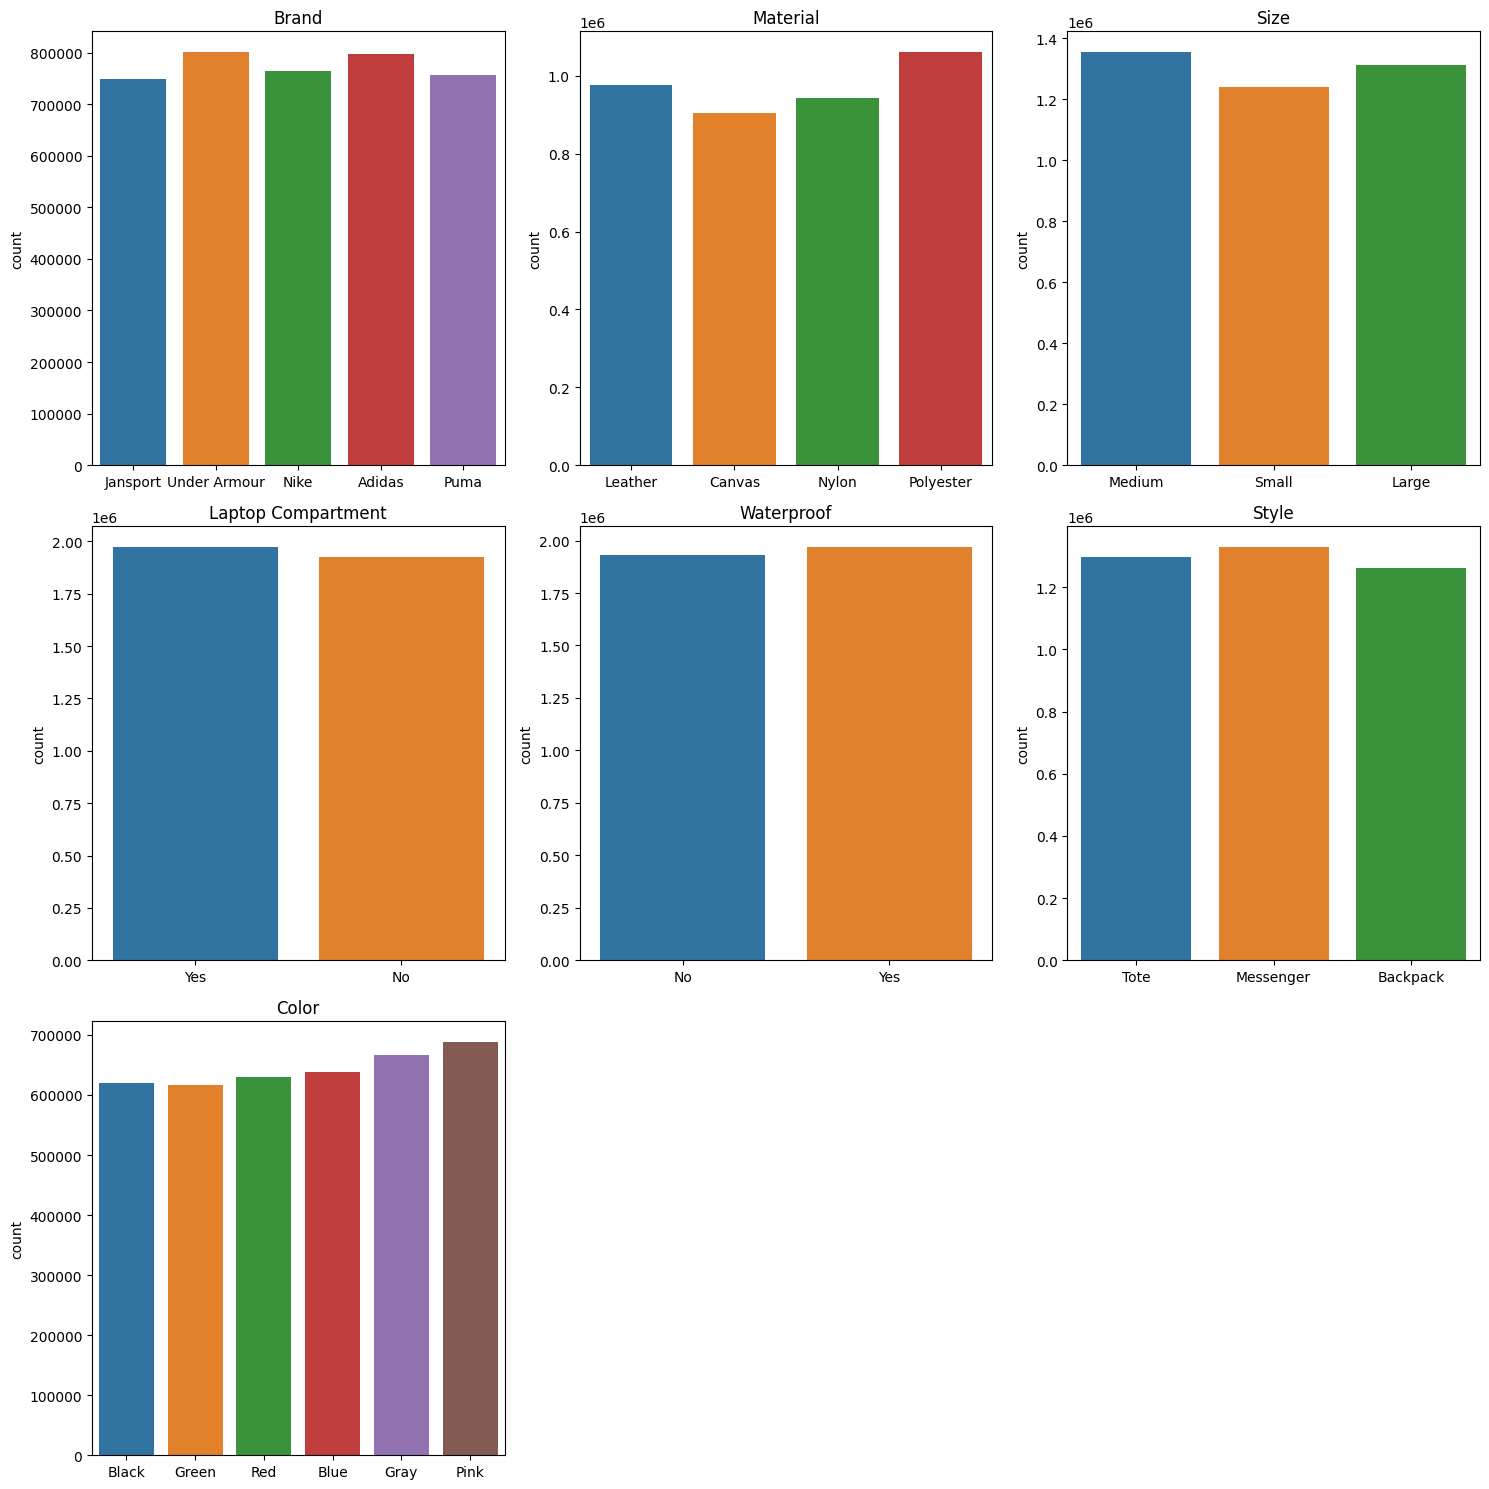

In [20]:
rows = int(np.ceil(len(categorical_features) / 3))  # Ensure it aligns with categorical_features
col = 3

# Creating figure and setting size
fig, axes = plt.subplots(rows, col, figsize=(15, rows * 5))
axes = axes.flatten()

# Looping through features and creating subplots
for idx, feature in enumerate(categorical_features):
    data = train_merge.copy()
    
    # Plot on current subplot
    sns.countplot(x=feature, data=data, ax=axes[idx])
    axes[idx].set_title(feature)
    axes[idx].set_xlabel('')

# Hide any unused subplots
for idx in range(len(categorical_features), len(axes)):  # Aligning with categorical_features
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

Check the count of all categorical data before filling in most frequent to prevent imbalanced dataset. From count plot it is evident that data is almost evenly distributed so now I am trying the approach of filling missing as unknown first.

In [21]:
from sklearn.impute import SimpleImputer

# Define the imputer with "constant" strategy, replacing missing values with "Unknown"
imputer = SimpleImputer(strategy="constant", fill_value="Unknown")

In [22]:
train_merge[categorical_features] = imputer.fit_transform(train_merge[categorical_features])

# Check if missing values are handled
print(train_merge.isnull().sum())

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64


In [23]:
# Data preprocessing on test dataset 
test['Weight Capacity (kg)']=test['Weight Capacity (kg)'].fillna(test['Weight Capacity (kg)'].median())
test[categorical_features]=imputer.transform(test[categorical_features])
test.isnull().sum()

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
dtype: int64

## Encoding the categorical features

Using mapping for Size column(can also use ordinal encoding). Then for columns with binary values i.e (Yes, No )I am using binary maping and for rest of categorical variables I am using Label encoder

In [24]:
#mapping size category 
size_mapping={
    'Unknown':0,
    'Small': 1,
    'Medium': 2,
    'Large': 3
}
train_merge['Size']=train_merge['Size'].replace(size_mapping)
test['Size']=test['Size'].replace(size_mapping)


In [25]:
def encode_binary_with_unknown(column):
    return column.map({"Yes": 1, "No": 0, "Unknown": 2}) 

train_merge["Laptop Compartment"] = encode_binary_with_unknown(train_merge["Laptop Compartment"])
train_merge["Waterproof"] = encode_binary_with_unknown(train_merge["Waterproof"])
test["Laptop Compartment"] = encode_binary_with_unknown(test["Laptop Compartment"])
test["Waterproof"] = encode_binary_with_unknown(test["Waterproof"])

In [26]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3694317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  int64  
 4   Compartments          float64
 5   Laptop Compartment    int64  
 6   Waterproof            int64  
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(4), object(4)
memory usage: 365.7+ MB


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

cat_cols=['Brand','Material','Style','Color']

for feature in cat_cols:
    train_merge[feature]=le.fit_transform(train_merge[feature])
    test[feature]=le.transform(test[feature])

# Model training 

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from catboost import CatBoostRegressor 
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import lightgbm as lgb

In [29]:
test.drop(['id'],inplace=True,axis=1)

In [30]:
y=train_merge['Price']
train_merge.drop(['Price','id'], inplace=True, axis=1)
X_train, X_test, y_train, y_test=train_test_split(train_merge,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")
rmse = mse_lr ** 0.5
print("RMSE",rmse)

Linear Regression MSE: 1513.7587228225796
RMSE 38.90705235330196


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define the model
xgb = XGBRegressor(n_jobs=-1)  # Use all available CPU cores

# Define smaller parameter space
param_dist = {
    'n_estimators': [50, 100, 200],  # Reduce large values
    'max_depth': [3, 5, 7],  # Smaller trees for faster training
    'learning_rate': [0.01, 0.1, 0.2],  
    'subsample': [0.6, 0.8, 1.0]
}

# Random search instead of exhaustive grid search
random_search = RandomizedSearchCV(
    xgb, param_dist, 
    scoring='neg_root_mean_squared_error', 
    cv=3, 
    n_iter=10,  # Test only 10 combinations instead of all
    verbose=1,
    random_state=42,
    n_jobs=-1  # Parallel processing
)

# Fit the model
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [34]:
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2}


In [35]:
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
#n_estimators=200, learning_rate=0.2, max_depth=5, random_state=42,subsample=0.8

# Fit the model
model_xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = model_xgb.predict(X_test)


In [36]:
y_pred=model_xgb.predict(test)

In [37]:
submissions['Price']=y_pred

In [38]:
submissions.to_csv('submission.csv', index=False)
print("✅ Submission file saved successfully!")

✅ Submission file saved successfully!
